<a href="https://colab.research.google.com/github/subodh2708/deep-learning---tensorflow-2.0/blob/main/10_time_series_forecasting_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time Series Forcasting fundamentals with tensorflow + milestone project 3: BitPredict💹💰

## Get Data 

In [1]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

--2022-09-27 19:24:05--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.004s  

2022-09-27 19:24:06 (38.2 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’ saved [178509/178509]



## Importing time-series with pandas

In [2]:
import pandas as pd

df = pd.read_csv('/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv',
                 parse_dates = ['Date'],
                 index_col = ['Date'])

df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [3]:
bitcoin_price = pd.DataFrame(df['Closing Price (USD)']).rename(columns= {'Closing Price (USD)':'price'})
bitcoin_price

,price
Date,
2013-10-01,123.654990
2013-10-02,125.455000
2013-10-03,108.584830
2013-10-04,118.674660
2013-10-05,121.338660
...,...
2021-05-14,49764.132082
2021-05-15,50032.693137
2021-05-16,47885.625255


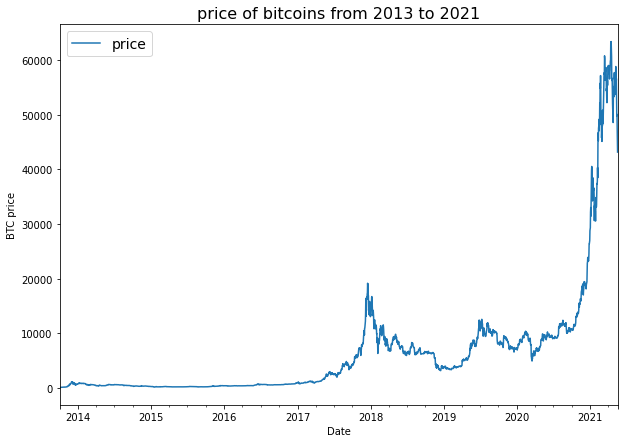

In [4]:
import matplotlib.pyplot as plt

bitcoin_price.plot(figsize = (10,7))
plt.ylabel('BTC price')
plt.title('price of bitcoins from 2013 to 2021', fontsize= 16)
plt.legend(fontsize= 14)


## importing time series data with python CSV module

In [5]:
import csv
from datetime import datetime

timesteps = []
btc_price = []
with open('/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv', 'r') as f:
  csv_reader = csv.reader(f, delimiter= ',')
  next(csv_reader)
  for line in csv_reader:
    timesteps.append(datetime.strptime(line[1], '%Y-%m-%d'))
    btc_price.append(float(line[2]))

timesteps[:10], btc_price[:10]

([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0),
  datetime.datetime(2013, 10, 6, 0, 0),
  datetime.datetime(2013, 10, 7, 0, 0),
  datetime.datetime(2013, 10, 8, 0, 0),
  datetime.datetime(2013, 10, 9, 0, 0),
  datetime.datetime(2013, 10, 10, 0, 0)],
 [123.65499,
  125.455,
  108.58483,
  118.67466,
  121.33866,
  120.65533,
  121.795,
  123.033,
  124.049,
  125.96116])

Text(0.5, 0, 'date')

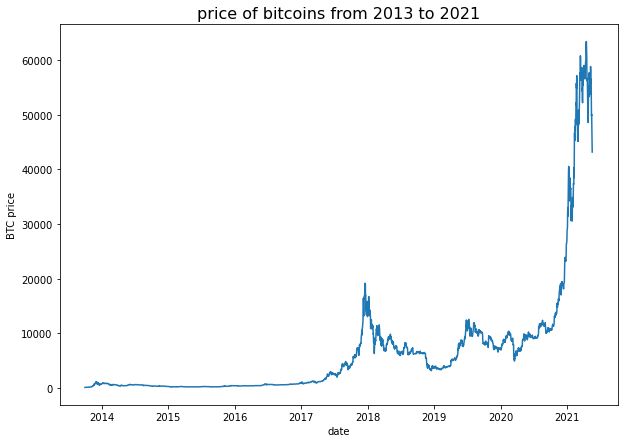

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize= (10,7))
plt.plot(timesteps, btc_price)
plt.ylabel('BTC price')
plt.title('price of bitcoins from 2013 to 2021', fontsize= 16)
plt.xlabel('date')

## Format data part 1: create train and test set of our time series data

### creating train and test sets with time series data( the wrong way)

In [7]:
timesteps = bitcoin_price.index.to_numpy()
prices = bitcoin_price['price'].to_numpy()

timesteps[:10] , prices[:10]

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', '2013-10-04T00:00:00.000000000',
        '2013-10-05T00:00:00.000000000', '2013-10-06T00:00:00.000000000',
        '2013-10-07T00:00:00.000000000', '2013-10-08T00:00:00.000000000',
        '2013-10-09T00:00:00.000000000', '2013-10-10T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116]))

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( timesteps, prices, test_size=0.2, random_state=42)

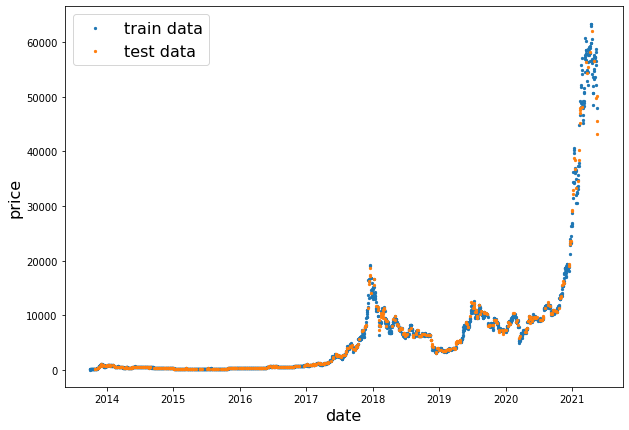

In [9]:
plt.figure(figsize= (10,7))
plt.scatter(X_train, y_train, s= 5, label = 'train data')
plt.scatter(X_test, y_test, s= 5, label= 'test data')
plt.xlabel('date', fontsize = 16)
plt.ylabel('price', fontsize= 16)
plt.legend(fontsize=16)

## Create train and test set for time series dataset ( the right way)

In [10]:
split_size = int(0.8 * len(prices))

X_train, y_train = timesteps[:split_size] , prices[:split_size]

X_test, y_test = timesteps[split_size:] , prices[split_size:]



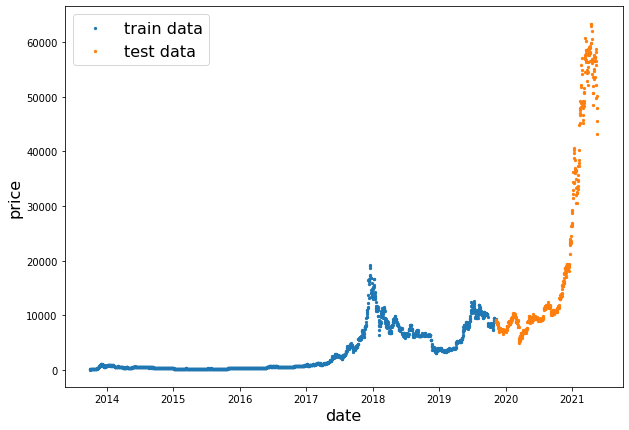

In [11]:
plt.figure(figsize =(10,7))
plt.scatter(X_train, y_train, s= 5, label = 'train data')
plt.scatter(X_test, y_test, s= 5, label= 'test data')
plt.xlabel('date', fontsize = 16)
plt.ylabel('price', fontsize= 16)
plt.legend(fontsize=16)

## Create a ploting function

In [12]:
def plot_time_series(timesteps, values, format = '.', start = 0 , end = None , label= None):

  plt.plot(timesteps[start:end],values[start:end], format, label = label)
  plt.xlabel('Time')
  plt.ylabel('BTC Price')
  if label:
    plt.legend(fontsize= 16)

  plt.grid(True)

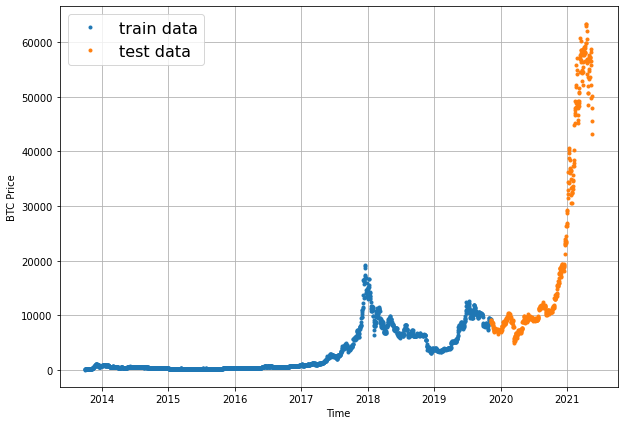

In [13]:
plt.figure(figsize = (10,7))
plot_time_series(timesteps = X_train , values = y_train , label= 'train data')
plot_time_series(X_test, y_test , label= 'test data')

## modelling experiment

### model 0: Naive Forecast(baseline)

In [14]:
naive_forecast = y_test[:-1]

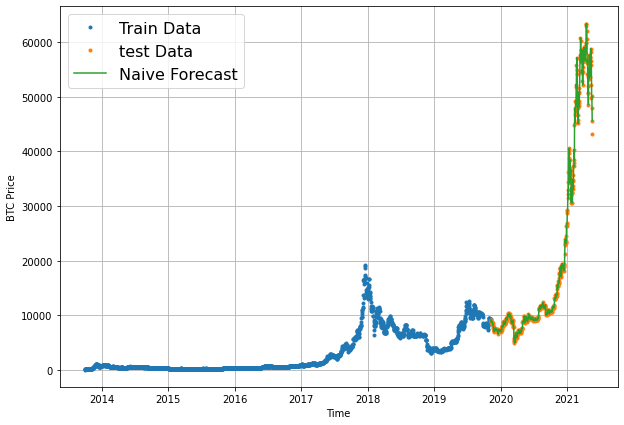

In [15]:
plt.figure(figsize= (10,7))
plot_time_series(X_train,y_train, label= 'Train Data')
plot_time_series(X_test , y_test, label= 'test Data')
plot_time_series(timesteps = X_test[1:], values = naive_forecast, format= '-', label= 'Naive Forecast')

## Evaluating the time series model

In [16]:
import tensorflow as tf

In [17]:
def mean_absolute_scaled_error(y_true,y_pred):
  mae= tf.reduce_mean(tf.abs(y_true - y_pred))
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1]))

  return mae/mae_naive_no_season

In [18]:
mean_absolute_scaled_error(y_true = y_test[1:], y_pred = naive_forecast).numpy()

0.9995699939182624

In [19]:
def evaluate_preds(y_true,y_pred):
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype= tf.float32)

  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true,y_pred)
  rmse = tf.sqrt(mae)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true,y_pred)
  mase = mean_absolute_scaled_error(y_true,y_pred)

  return{'mae':mae.numpy(),
         'mse':mse.numpy(),
         'rmse':rmse.numpy(),
         'mape':mape.numpy(),
         'mase': mase.numpy()}

In [20]:
naive_results = evaluate_preds(y_true = y_test[1:],
                               y_pred= naive_forecast)
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 23.832336,
 'mape': 2.5165248,
 'mase': 0.99957}

In [21]:
naive_forecast[-10:]

array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
       56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
       47885.62525472, 45604.61575361])

In [22]:
tf.reduce_mean(y_test)

<tf.Tensor: shape=(), dtype=float64, numpy=20056.632963737226>

In [23]:
tf.reduce_max(y_test), tf.reduce_min(y_test)

(<tf.Tensor: shape=(), dtype=float64, numpy=63346.7890351052>,
 <tf.Tensor: shape=(), dtype=float64, numpy=4944.7023359837>)

## Format data part 2: Windowing the dataset

In [24]:
print(f'we want to use this {btc_price[:7]} to predict this {btc_price[7]}')

we want to use this [123.65499, 125.455, 108.58483, 118.67466, 121.33866, 120.65533, 121.795] to predict this 123.033


In [25]:
HORIZON = 1
WINDOW_SIZE = 7

In [26]:
def get_labelled_windows(x, horizon=HORIZON):

  return x[:, :-horizon], x[:, -horizon:]


In [27]:
test_window, test_label = get_labelled_windows(tf.expand_dims(tf.range(8) +1, axis=0))
print(f' window: {tf.squeeze(test_window)} -->  label: {tf.squeeze(test_label)}') 

 window: [1 2 3 4 5 6 7] -->  label: 8


In [28]:
import numpy as np

def make_windows(x , window_size=WINDOW_SIZE, horizon = HORIZON):
  window_step = np.expand_dims(np.arange(window_size + horizon), axis=0)
  window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size + horizon - 1)),axis=0).T

  #print(f'window_indexes: \n{window_indexes, window_indexes.shape}')
  windowed_array =  x[window_indexes]

  windows,labels = get_labelled_windows(windowed_array, horizon= horizon)
  return windows,labels


In [29]:
full_windows, full_labels = make_windows(prices, window_size= WINDOW_SIZE, horizon = HORIZON)

In [30]:
for i in range(3):
  print(f'windows: {full_windows[i]} --> labels: {full_labels[i]}')

windows: [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] --> labels: [123.033]
windows: [125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ] --> labels: [124.049]
windows: [108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ] --> labels: [125.96116]


## Turning windows into train and test set

In [31]:
def make_train_test_split(windows, labels, test_split=0.2):
  split_size = int(len(windows) * (1- test_split))
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]
  return train_windows, test_windows, train_labels , test_labels

In [32]:
train_windows,test_windows,train_labels,test_labels = make_train_test_split(full_windows,full_labels)

## making a modelling checkpoint callback

In [34]:
import os

def create_model_checkpoint(model_name, save_path = 'model_experiment'):
  return tf.keras.callbacks.ModelCheckpoint(filepath = os.path.join(save_path, model_name),
                                            verbose = 0,
                                            save_best_only= True)

## model 1 : Dense model (window = 7, horizon = 1)

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

tf.random.set_seed(42)
model_1 = tf.keras.Sequential([
    layers.Dense(128, activation= 'relu'),
    layers.Dense(HORIZON,activation = 'linear')
],name = 'model_1_dense')

model_1.compile(loss = 'mae',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['mae','mse'])

model_1.fit(x =train_windows,
            y = train_labels,
            epochs = 100,
            batch_size = 128,
            validation_data = (test_windows, test_labels),
            callbacks = [create_model_checkpoint(model_name = model_1.name)])

In [38]:
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 1ms/step - loss: 662.5320 - mae: 662.5320 - mse: 1358191.3750


[662.531982421875, 662.531982421875, 1358191.375]

In [41]:
model_1 = tf.keras.models.load_model("model_experiment/model_1_dense/")
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 1ms/step - loss: 568.5498 - mae: 568.5498 - mse: 1172587.2500


[568.5498046875, 568.5498046875, 1172587.25]

## Making forecast with a model (on the test dataset )

In [42]:
def make_preds(model, input_data):

  forecast = model.predict(input_data)
  return tf.squeeze(forecast)

In [45]:
model_1_preds = make_preds(model_1, test_windows)
model_1_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8874.493, 8789.943, 9040.986, 8804.829, 8741.211, 8749.835,
       8705.866, 8513.171, 8478.416, 8536.302], dtype=float32)>

In [46]:
model_1_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred = model_1_preds)

In [47]:
model_1_results

{'mae': 568.5498,
 'mse': 1172587.6,
 'rmse': 23.844282,
 'mape': 2.549229,
 'mase': 0.99878454}

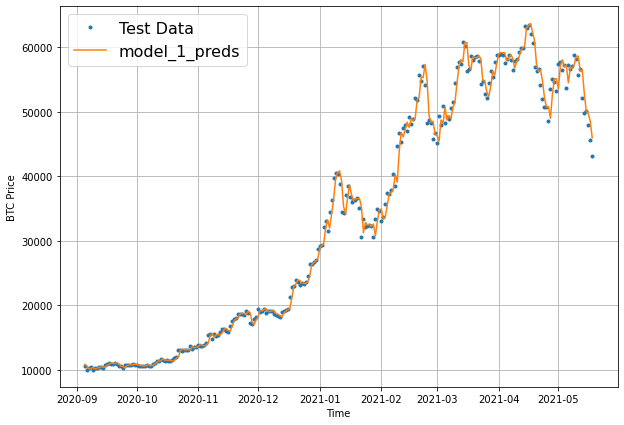

In [52]:
offset = 300
plt.figure(figsize = (10,7))

plot_time_series(timesteps=X_test[-len(test_windows):],
                 values = test_labels[:,0],
                 start = offset, label = "Test Data")

plot_time_series(timesteps=X_test[-len(test_windows):],
                 values = model_1_preds,
                 start = offset,
                 format = "-",
                 label = "model_1_preds")
